In [1]:
import sys
sys.path.append('/home/dice/Desktop/physionet_0.org/python-example-2023')

In [2]:
import numpy as np
import pandas as pd
import scipy.io
from team_code import *
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import wfdb
warnings.filterwarnings("ignore")

/tmp/ipykernel_3643/1757128221.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Ploting raw data of few patient

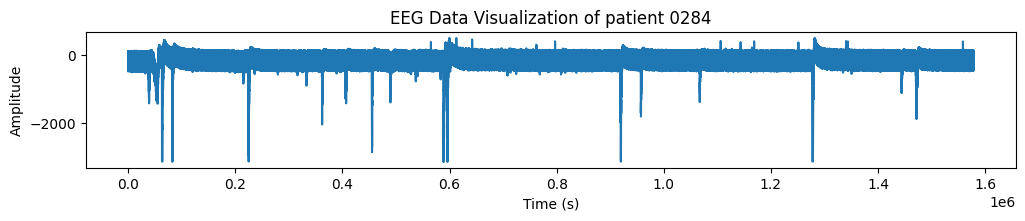

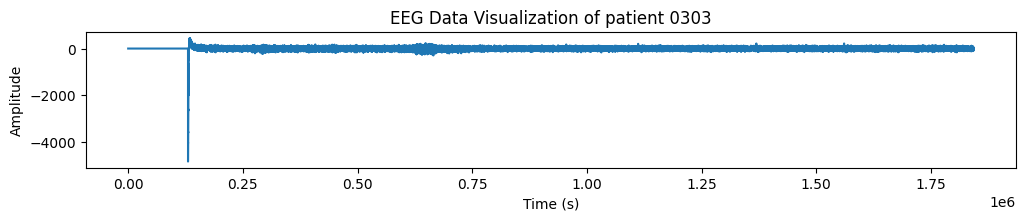

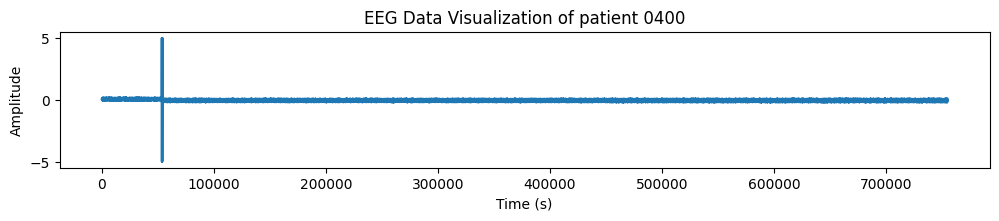

In [10]:
def generate_signal(hea_file_path): #Generate .hea signals

    signals, _ = wfdb.rdsamp(hea_file_path, channels=[0])  # Read the channel

    return signals

# Specify the full path to the .hea file (replace with your actual file path)
hea_file_path1 = '/home/dice/Desktop/physionet_0.org/python-example-2023/training_data/0284/0284_001_004_ECG'
hea_file_path2 = '/home/dice/Desktop/physionet_0.org/python-example-2023/training_data/0303/0303_002_022_ECG'
hea_file_path3 = '/home/dice/Desktop/physionet_0.org/python-example-2023/training_data/0400/0400_001_010_ECG'


data1 = generate_signal(hea_file_path1)
data2 = generate_signal(hea_file_path2)
data3 = generate_signal(hea_file_path3)

# Plot the data
plt.figure(figsize=(12, 6))

plt.subplot(3,1,1)
plt.plot(data1)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('EEG Data Visualization of patient 0284')
plt.show()

# Plot the data
plt.figure(figsize=(12, 6))
plt.subplot(3,1,2)
plt.plot(data2)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('EEG Data Visualization of patient 0303')
plt.show()

# Plot the data
plt.figure(figsize=(12, 6))
plt.subplot(3,1,3)
plt.plot(data3)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('EEG Data Visualization of patient 0400')
plt.show()


### Plot cleaned data of few patients

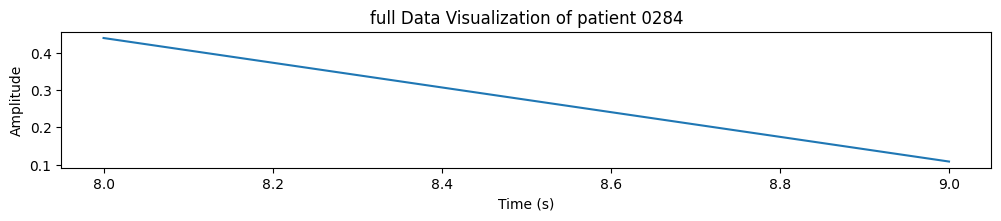

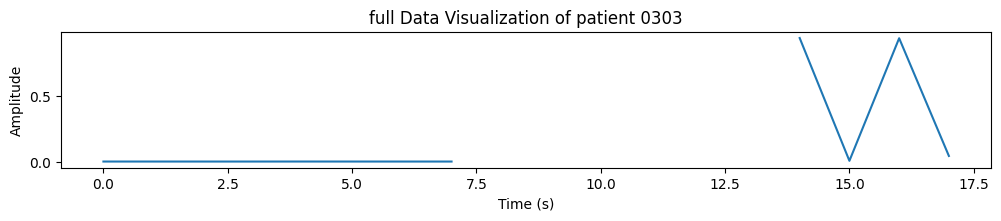

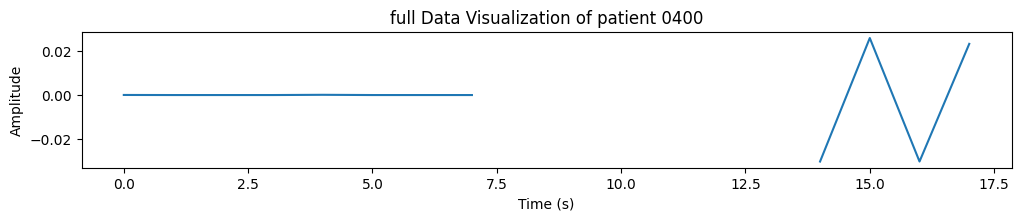

In [31]:
from scipy.interpolate import interp1d

data_folder = '/home/dice/Desktop/physionet_0.org/python-example-2023/training_data/'
patient_ids = ['0284', '0303','0400']

i = 1
for patient_id in patient_ids:

    u = get_features(data_folder, patient_id)
    data = u[8:]

    plt.figure(figsize=(12, 6))
    plt.subplot(3,1,i)
    plt.plot(data)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title(f'full Data Visualization of patient {patient_id}')
    plt.show
    i+=1

### generate .txt data as csv

In [24]:
import pandas as pd

data_folder = '/home/dice/Desktop/physionet_0.org/python-example-2023/big_training'
cols = ['age', 'fem.', 'male', 'other', 'rosc', 'ohca', 'rythm', 'ttm', 'out']
indx = []  # Initialize an empty list for indices
data = []  # Initialize an empty list for data

patient_ids = find_data_folders(data_folder)

for i in range(len(patient_ids)):
    patient_metadata = load_challenge_data(data_folder, patient_ids[i])
    u = list(get_features(data_folder, patient_ids[i]))
    current_outcome = get_outcome(patient_metadata)
    u = u[:8]  # takes only those in the .txt files

    u.append(current_outcome)
    
    # Use the patient_id as the index
    indx.append(patient_ids[i])

    # Append the data to the list
    data.append(u)

#Create DataFrame using the constructed data and indices
df = pd.DataFrame(data, columns=cols, index=indx)

#Display the DataFrame
df.to_csv('txtdata.csv')
print(df)


       age  fem.  male  other  rosc  ohca  rythm   ttm  out
0284  53.0   0.0   1.0    0.0   NaN   1.0    1.0  33.0    0
0286  85.0   1.0   0.0    0.0   7.0   0.0    0.0   NaN    0
0296  48.0   0.0   1.0    0.0   NaN   1.0    1.0  36.0    0
0299  45.0   0.0   1.0    0.0   NaN   1.0    1.0  33.0    0
0303  51.0   0.0   1.0    0.0  24.0   1.0    1.0  33.0    0
...    ...   ...   ...    ...   ...   ...    ...   ...  ...
1016  87.0   0.0   1.0    0.0   7.0   1.0    0.0  33.0    1
1017  26.0   0.0   1.0    0.0  52.0   1.0    0.0   NaN    1
1018  63.0   0.0   1.0    0.0   NaN   1.0    1.0  36.0    1
1019  72.0   0.0   1.0    0.0   NaN   1.0    1.0  36.0    0
1020  67.0   0.0   1.0    0.0   NaN   1.0    1.0  36.0    0

[607 rows x 9 columns]


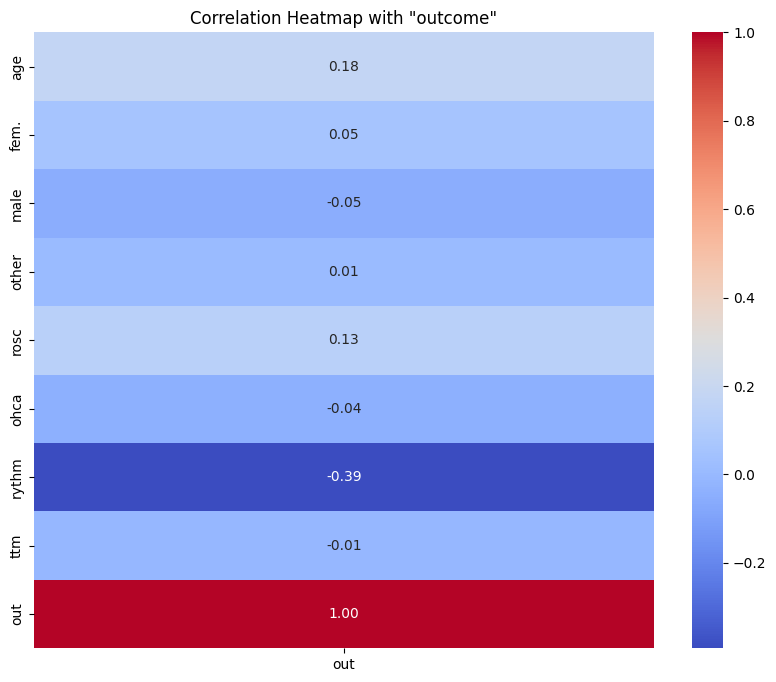

In [25]:
# Calculate correlation matrix with the output variable
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[['out']], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap with "outcome"')
plt.show()

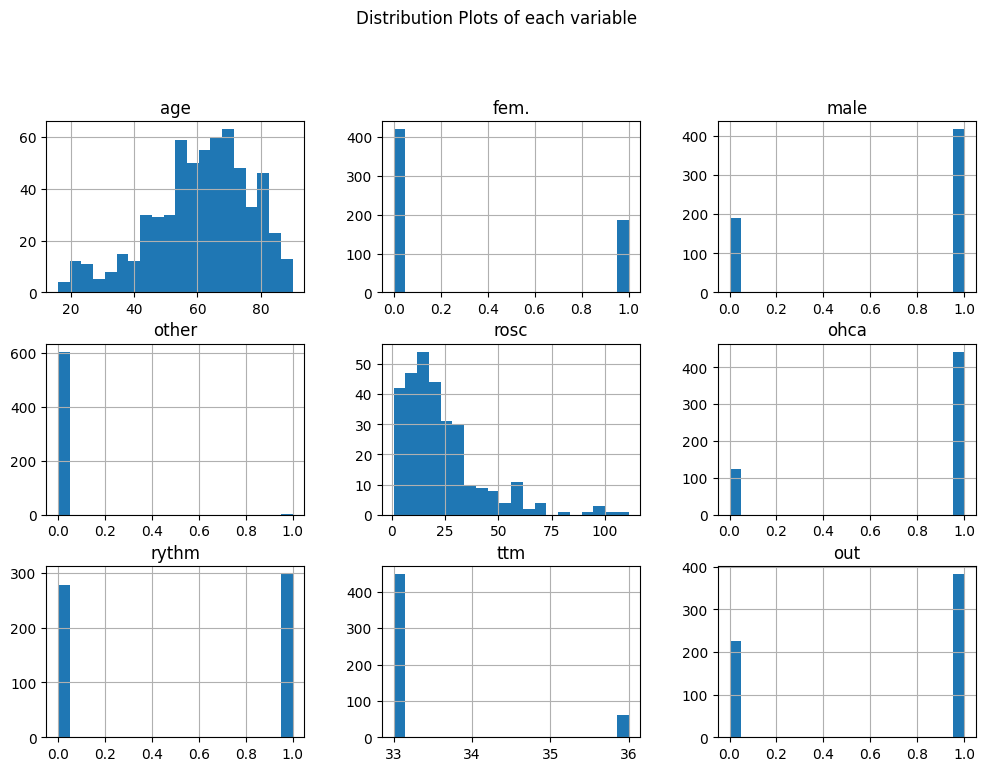

In [26]:
# Assuming df is your DataFrame
df.hist(bins=20, figsize=(12, 8))
plt.suptitle('Distribution Plots of each variable', y=1.02)
plt.show()


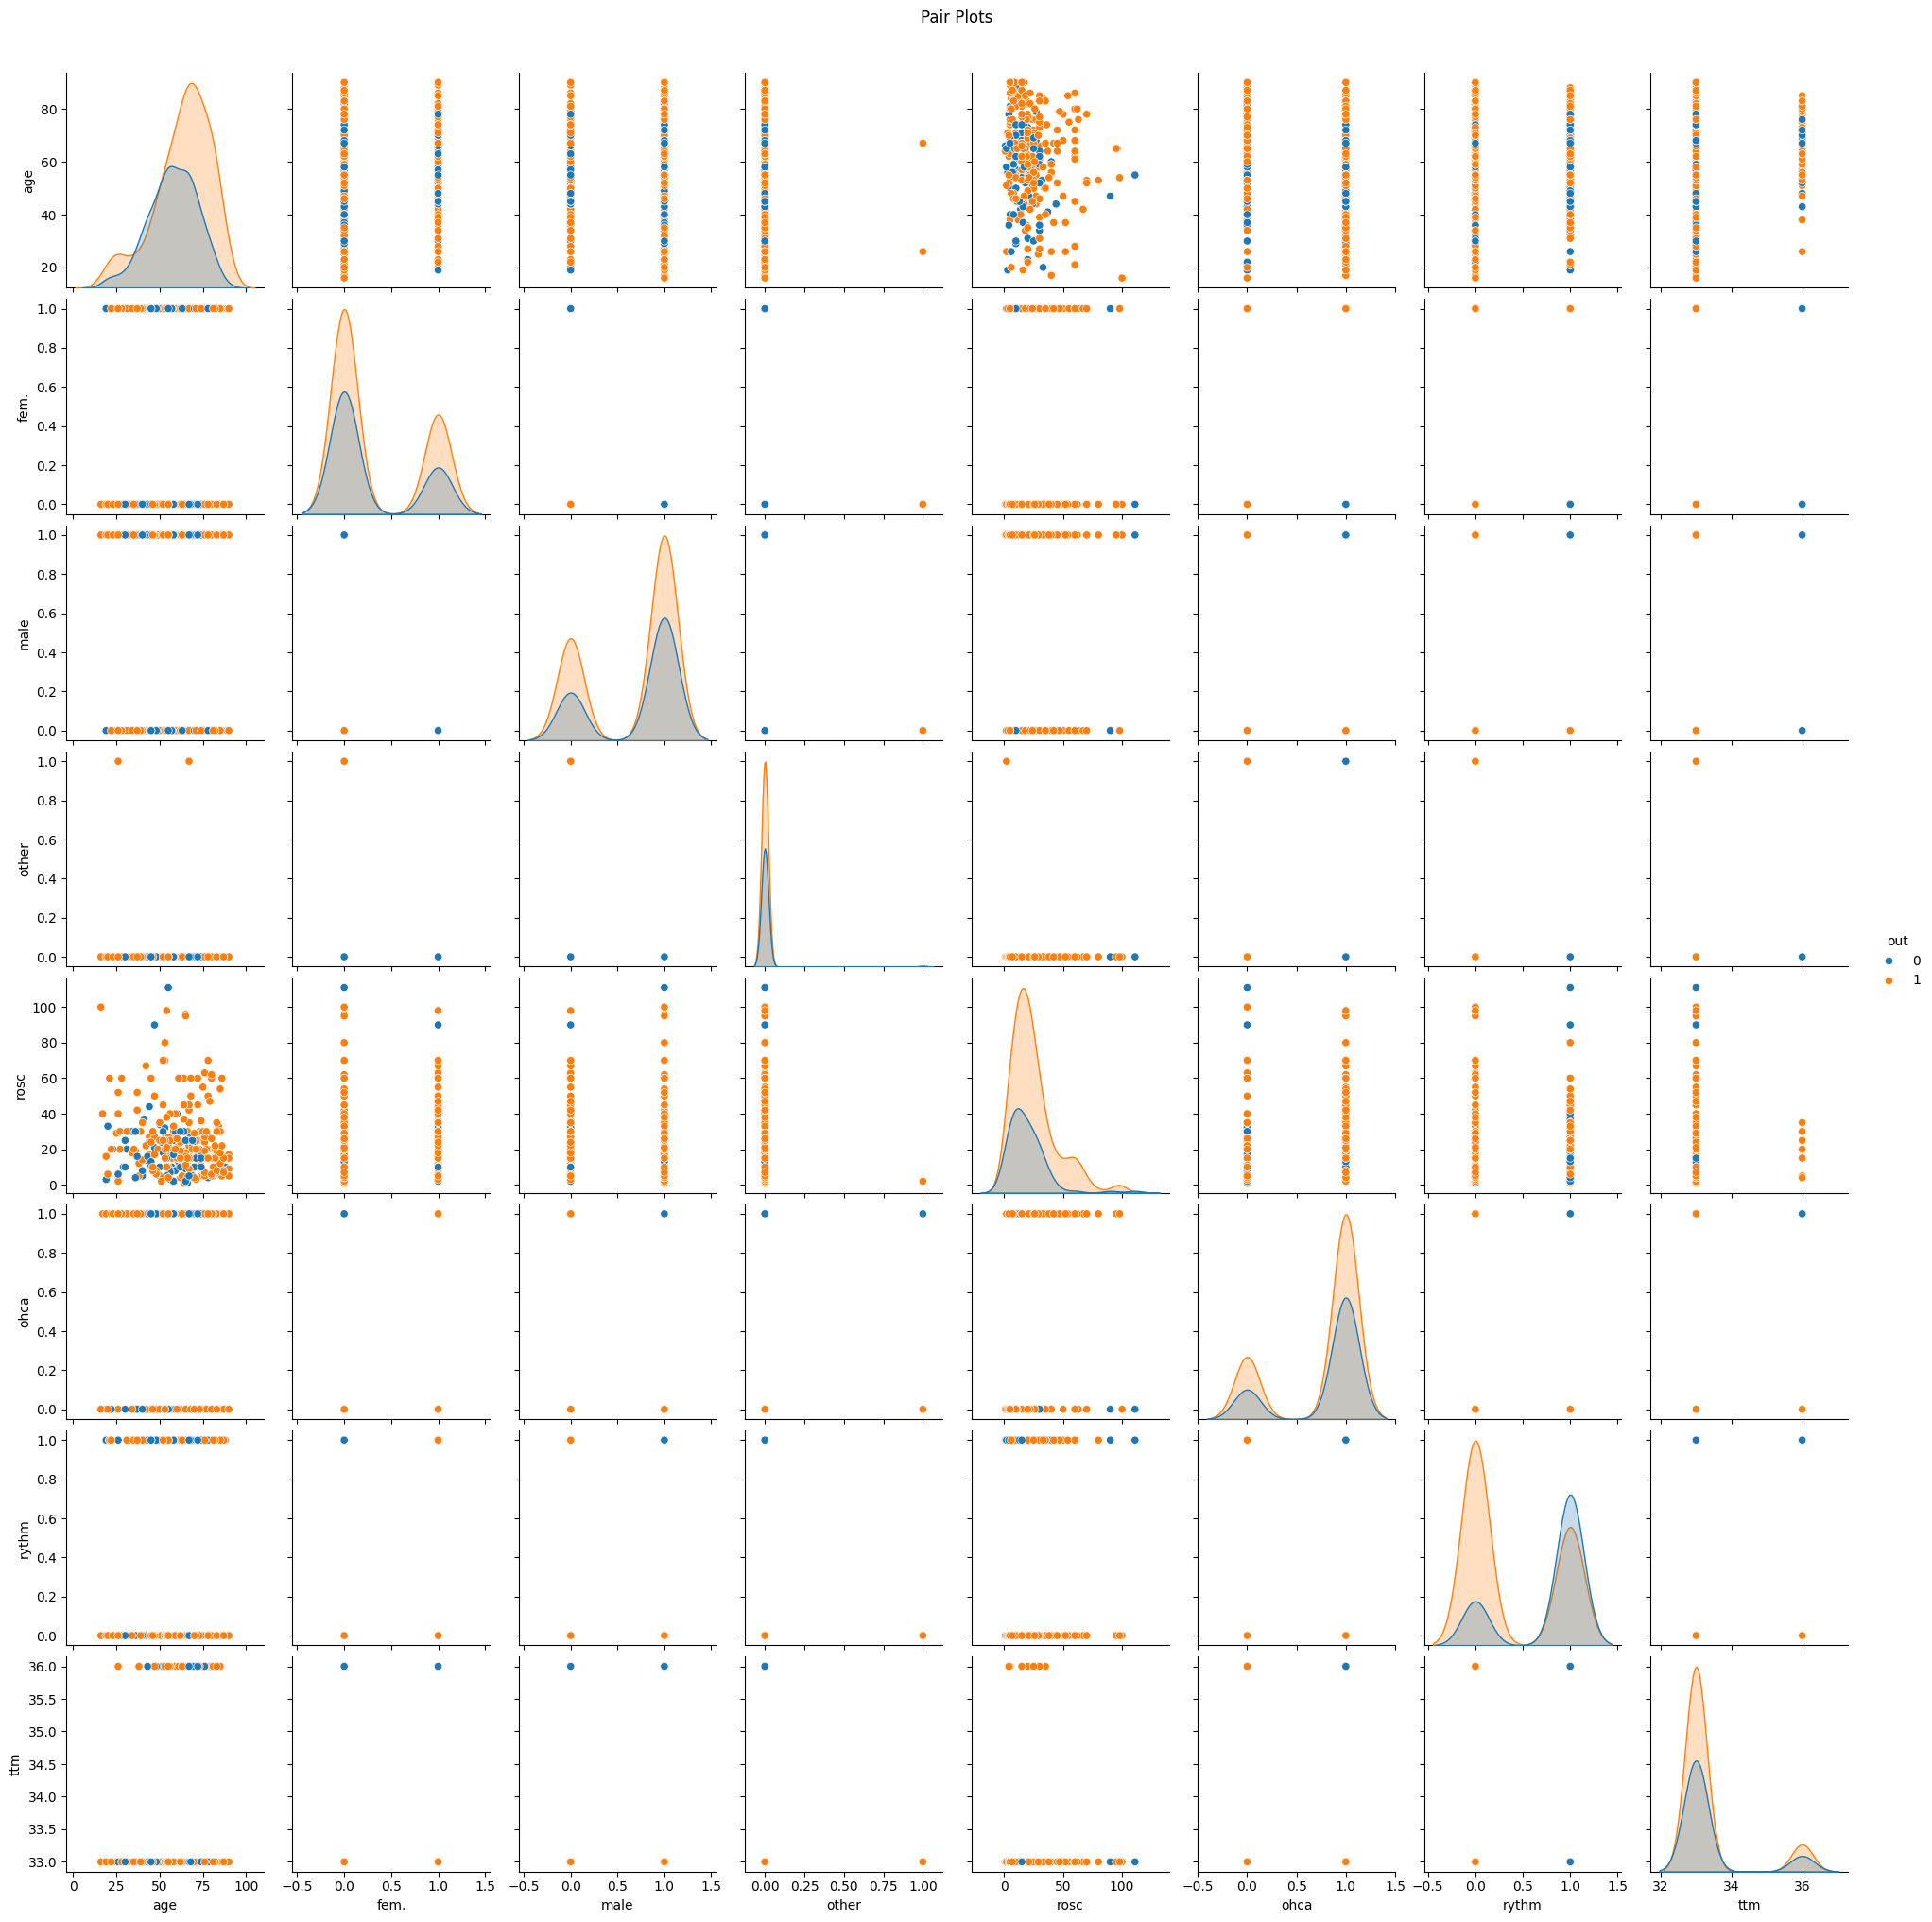

In [27]:
sns.pairplot(df, hue='out', diag_kind='kde')
plt.suptitle('Pair Plots', y=1.02)
plt.show()

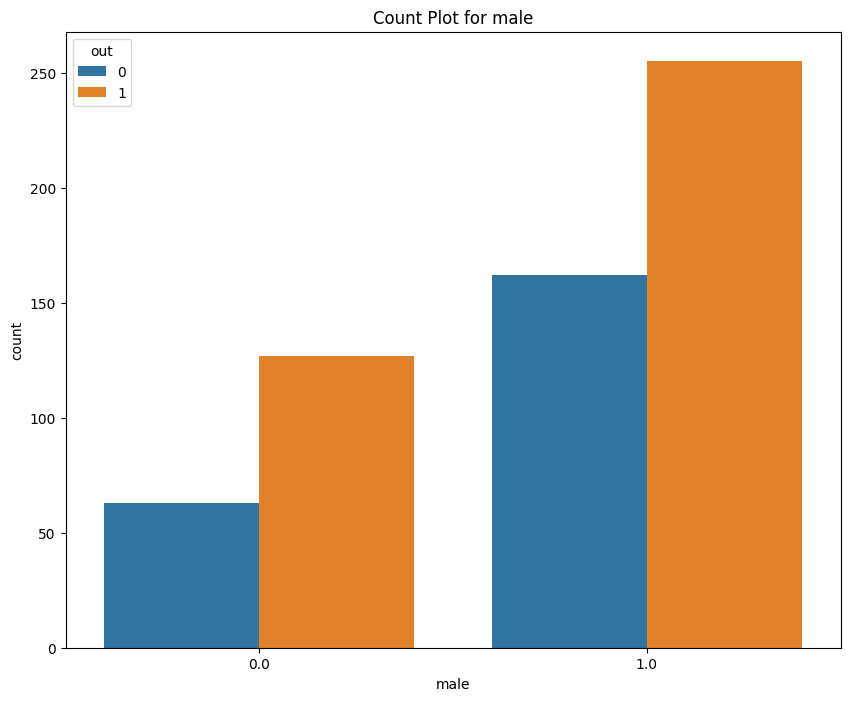

In [28]:
plt.figure(figsize=(10, 8))
sns.countplot(x='male', hue='out', data=df)
plt.title('Count Plot for male')
plt.show()

In [29]:
plt.figure(figsize=(10, 8))
sns.countplot(x='ohca', hue='out', data=df)
plt.title('Count Plot for Schockable OHCA')
plt.show()

KeyboardInterrupt: 

In [ ]:
data_folder = '/home/dice/Desktop/physionet_0.org/python-example-2023/training_data'
patient_id = '0303' 
u = get_features(data_folder, patient_id)
print(len(u))

26


In [ ]:
patient_ids = find_data_folders(data_folder)
 #patient_ids
i = 1
patient_metadata = load_challenge_data(data_folder, patient_ids[i])
current_outcome  = get_outcome(patient_metadata)
current_outcome  

0

In [ ]:
data_folder = '/home/dice/Desktop/physionet_0.org/python-example-2023/big_training'
cols = ['age', 'fem.', 'male', 'other', 'rosc', 'ohca', 'rythm', 'ttm', 'out']
indx = []  # Initialize an empty list for indices
data = []  # Initialize an empty list for data

patient_ids = find_data_folders(data_folder)

for i in range(len(patient_ids)):
    patient_metadata = load_challenge_data(data_folder, patient_ids[i])
    u = list(get_features(data_folder, patient_ids[i]))
    current_outcome = get_outcome(patient_metadata)
    u = u[:8]  # takes only those in the .txt files

    u.append(current_outcome)
    
    # Use the patient_id as the index
    indx.append(patient_ids[i])

    # Append the data to the list
    data.append(u)

#Create DataFrame using the constructed data and indices
df = pd.DataFrame(data, columns=cols, index=indx)

#Display the DataFrame
df.to_csv('txtdata.csv')
print(df)

20